In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv(r"C:/Users/LENOVE/Desktop/Machine Learning/Datasets/loan_cleaned.csv")

In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [4]:
dataset.isnull().sum().sum()

0

In [5]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [136]:
en_data = dataset[["Gender","Married"]]
pd.get_dummies(en_data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Gender_Female  614 non-null    bool 
 1   Gender_Male    614 non-null    bool 
 2   Married_No     614 non-null    bool 
 3   Married_Yes    614 non-null    bool 
dtypes: bool(4)
memory usage: 2.5 KB


One Hot Encoding

In [137]:
from sklearn.preprocessing import OneHotEncoder

In [138]:
ohe = OneHotEncoder(drop="first" )
arr = ohe.fit_transform(en_data).toarray()

In [139]:
dataset[["Gender_Male", "Married_Yes"]] = pd.DataFrame(arr, columns=["Gender_Male", "Married_Yes"])

Nominal Encoding

In [140]:
# from sklearn.preprocessing import LabelEncoder

In [141]:
# la = LabelEncoder()
# la.fit_transform(["Property_Area"])

Ordinal encoding

In [142]:
from sklearn.preprocessing import OrdinalEncoder

In [143]:
dataset["Property_Area"].unique()

array([0., 1., 2.])

In [144]:
en_data_ord = [['Urban','Rural','Semiurban']]

In [145]:
oe = OrdinalEncoder(categories=en_data_ord)
dataset["Property_Area"] = oe.fit_transform(dataset[["Property_Area"]])

ValueError: could not convert string to float: 'Urban'

In [146]:
dataset.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.000000,0.0,Y,1.0,0.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.000000,1.0,N,1.0,1.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.000000,0.0,Y,1.0,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.000000,0.0,Y,1.0,1.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.000000,0.0,Y,1.0,0.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.000000,0.0,Y,1.0,1.0
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.000000,0.0,Y,1.0,1.0
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.000000,2.0,N,1.0,1.0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.000000,0.0,Y,1.0,1.0
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.000000,2.0,N,1.0,1.0


Finding Outliers

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

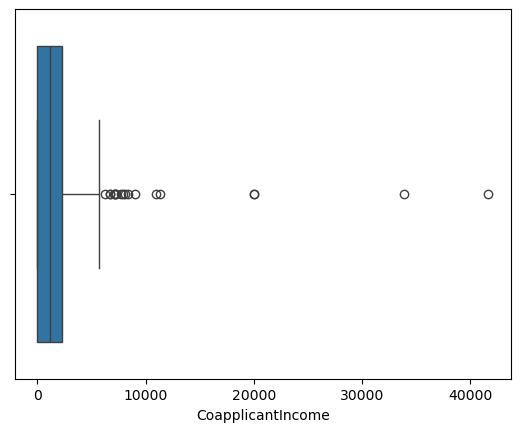

In [148]:
sns.boxplot(x = "CoapplicantIncome",data=dataset)
plt.show()

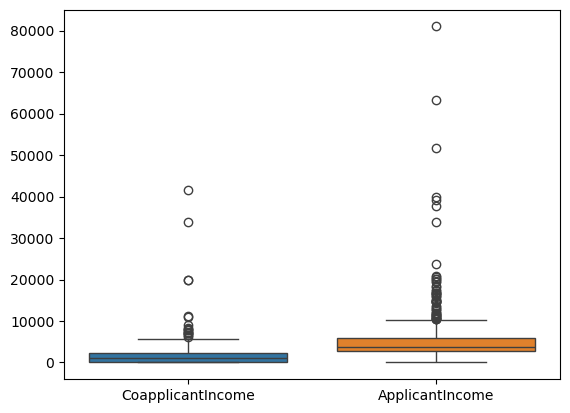

In [149]:
sns.boxplot(data=dataset[['CoapplicantIncome', 'ApplicantIncome']])
plt.show()


C:\Users\LENOVE\AppData\Local\Temp\ipykernel_20196\680334976.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[["CoapplicantIncome","ApplicantIncome"]])


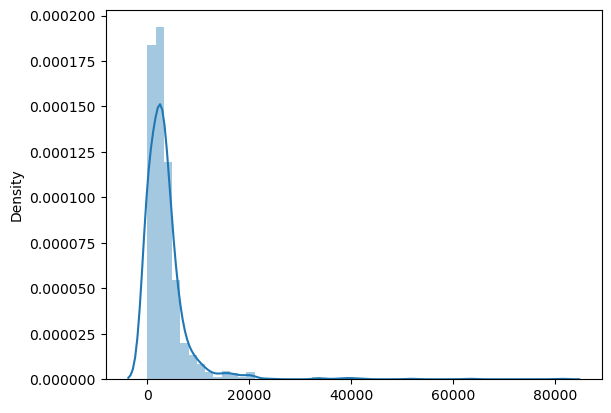

In [150]:
sns.distplot(dataset[["CoapplicantIncome","ApplicantIncome"]])
plt.show()

Removing Outliers Using IQR

In [151]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Male,Married_Yes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.050489,0.817590,0.653094
std,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.840875,0.386497,0.476373
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,1.000000,0.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000,1.000000


In [152]:
dataset.shape

(614, 15)

In [153]:
q1 = dataset["CoapplicantIncome"].quantile(0.25)
q3 = dataset["CoapplicantIncome"].quantile(0.75)
q3

2297.25

In [154]:
IQR = q3 - q1

In [155]:
min_range= q1-(1.5*IQR)
max_range= q3+(1.5*IQR)
min_range,max_range

(-3445.875, 5743.125)

In [156]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,0.0,Y,1.0,0.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,1.0,N,1.0,1.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,0.0,Y,1.0,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,0.0,Y,1.0,1.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,0.0,Y,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,1.0,Y,0.0,0.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,1.0,Y,1.0,1.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,0.0,Y,1.0,1.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,0.0,Y,1.0,1.0


In [157]:
new_dataset = dataset[dataset["CoapplicantIncome"]<=max_range]

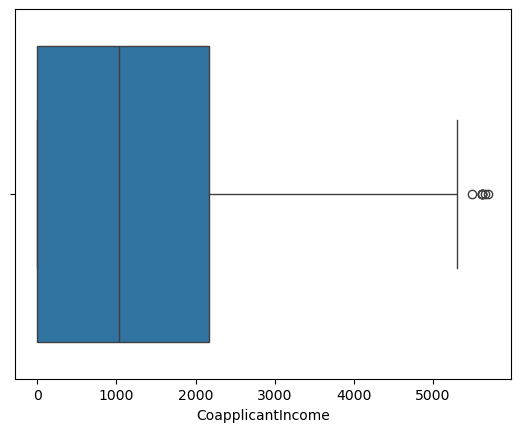

In [158]:
sns.boxplot(x = "CoapplicantIncome",data=new_dataset)
plt.show()

In [159]:
new_dataset.shape

(596, 15)

In [160]:
q1 = dataset["ApplicantIncome"].quantile(0.25)
q3 = dataset["ApplicantIncome"].quantile(0.75)
q3

5795.0

In [161]:
IQR = q3 - q1

In [162]:
min_range= q1-(1.5*IQR)
max_range= q3+(1.5*IQR)
min_range,max_range

(-1498.75, 10171.25)

In [163]:
new_dataset1 = dataset[dataset["ApplicantIncome"]<=max_range]

In [164]:
new_dataset1.shape

(564, 15)

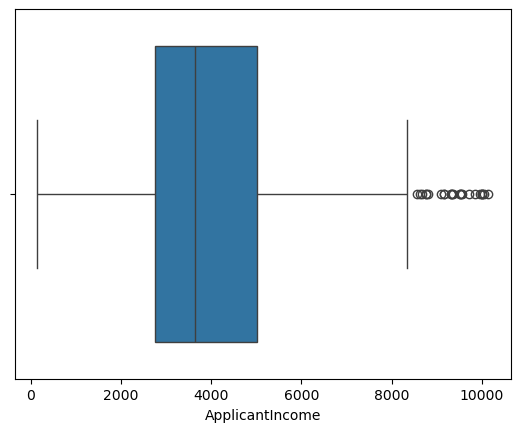

In [165]:
sns.boxplot(x = "ApplicantIncome",data=new_dataset1)
plt.show()

In [167]:
print(type(arr))
print(arr.shape)
print(arr[:5])


<class 'numpy.ndarray'>
(614, 2)
[[1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]]


In [168]:
print(dataset.shape)


(614, 15)


In [169]:
dataset[["Gender_Male", "Married_Yes"]] = arr


In [171]:
dataset.to_csv("new_dataset_without outliers.csv", index=False)
print("✅ File saved successfully!")

# Verify
new_df = pd.read_csv("new_dataset_without outliers.csv")
print(new_df[["Gender_Male", "Married_Yes"]].head())


✅ File saved successfully!
   Gender_Male  Married_Yes
0          1.0          0.0
1          1.0          1.0
2          1.0          1.0
3          1.0          1.0
4          1.0          0.0


In [176]:
# Step 1: Check shape
print("Dataset shape before saving:", new_dataset1.shape)

# Step 2: Save the DataFrame to a CSV file
new_dataset1.to_csv("new_dataset_without outliers.csv", index=False)

# Step 3: Confirmation message
print("✅ new_dataset_without outliers.csv saved successfully as 'new_dataset1_encoded.csv'")


Dataset shape before saving: (564, 15)
✅ new_dataset_without outliers.csv saved successfully as 'new_dataset1_encoded.csv'
